# VGG NET 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time


C:\Users\dell\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


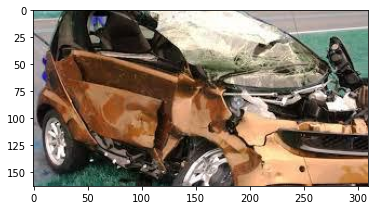

In [2]:
DATADIR= r"C:\Users\dell\Documents\RT project deep learning\data1a\training\00-damage\Augmented"
CATEGORIES=["High","Medium","Low"]
#going to iterate through the two categories
for category in CATEGORIES:
    path= os.path.join(DATADIR,category)#path to cats or dogs dir
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img)) #cv2.IMREAD_RGB)
        plt.imshow(img_array)#,cmap="gray")
        plt.show()
        break
    break

In [3]:
print(img_array.shape)


(163, 310, 3)


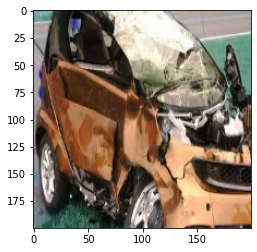

In [4]:
IMG_SIZE= 200
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)
plt.show()


In [5]:
new_array.shape


(200, 200, 3)

In [6]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path= os.path.join(DATADIR,category)#path to dataset
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array= cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()

In [7]:
print(len(training_data))


1840


In [8]:
new_array.shape


(200, 200, 3)

In [9]:
import random
random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

1
2
2
2
1
2
0
0
2
0


In [11]:
X_calamity=[]#features
y_calamity=[]#labels

In [12]:
for features, label in training_data:
    X_calamity.append(features)
    y_calamity.append(label)
    
X_calamity= np.array(X_calamity).reshape(-3,IMG_SIZE,IMG_SIZE,3)

In [13]:
X_calamity[0].shape


(200, 200, 3)

In [14]:
X_calamity[1]
y_calamity[1]

2

In [15]:
X_calamity=X_calamity/255.0 #normalising 


In [16]:
X_calamity.shape[1:]


(200, 200, 3)

In [17]:
#Model A
model = Sequential()
#First Convulational layer
model.add(Conv2D(kernel_size=3, strides=1, filters=32,input_shape=X_calamity.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#Second Convulational layer
model.add(Conv2D(kernel_size=3, strides=1, filters=64, padding='same',
                 activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=(2,2)))
#third Convulational layer
model.add(Conv2D(kernel_size=3, strides=1, filters=128, padding='same',
                 activation='relu', name='layer_conv3'))
model.add(MaxPooling2D(pool_size=(2,2)))
#drop-out layer 
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=2, strides=2))
#fourth Convulational layer
model.add(Conv2D(kernel_size=3, strides=1, filters=64, padding='same',
                 activation='relu', name='layer_conv4'))
model.add(MaxPooling2D(pool_size=(2,2)))
#fifth Convulational layer
model.add(Conv2D(kernel_size=3, strides=1, filters=32, padding='same',
                 activation='relu', name='layer_conv5'))
model.add(MaxPooling2D(pool_size=(2,2)))
#sixth Convulational layer
model.add(Conv2D(kernel_size=3, strides=1, filters=16, padding='same',
                 activation='relu', name='layer_conv6'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(32))
model.add(Activation("relu"))

#output layer 
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [18]:

y_calamity=np.array(y_calamity)
X_calamity=np.array(X_calamity)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 activation (Activation)     (None, 198, 198, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 layer_conv2 (Conv2D)        (None, 99, 99, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 layer_conv3 (Conv2D)        (None, 49, 49, 128)       7

In [20]:
#Results 
model.fit(X_calamity,y_calamity,batch_size=65, epochs=5, validation_split=0.1)

Epoch 1/5
26/26 [==============================] - 73s 3s/step - loss: -88.4043 - accuracy: 0.2977 - val_loss: -714.3904 - val_accuracy: 0.2935
Epoch 2/5
26/26 [==============================] - 83s 3s/step - loss: -124752.4531 - accuracy: 0.3176 - val_loss: -606233.3750 - val_accuracy: 0.2935
Epoch 3/5
26/26 [==============================] - 79s 3s/step - loss: -16226546.0000 - accuracy: 0.3176 - val_loss: -49574868.0000 - val_accuracy: 0.2935
Epoch 4/5
26/26 [==============================] - 81s 3s/step - loss: -574484672.0000 - accuracy: 0.3176 - val_loss: -1252620672.0000 - val_accuracy: 0.2935
Epoch 5/5
26/26 [==============================] - 81s 3s/step - loss: -7752526336.0000 - accuracy: 0.3176 - val_loss: -14845953024.0000 - val_accuracy: 0.2935


In [21]:
_,img_shape, image_shape,_=X_calamity.shape

In [22]:
image_shape=img_shape,img_shape,3
image_shape

(200, 200, 3)

In [23]:
#Helper Function to plot images 
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(image_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [24]:
#Predictions
images = X_calamity[0:9]

In [25]:
cls_true =y_calamity[0:9]

In [26]:
y_pred = model.predict(x=images)

1/1 [==============================] - 1s 737ms/step


In [27]:
cls_pred = np.argmax(y_pred, axis=1)

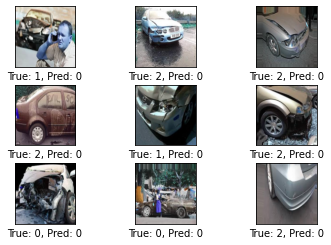

In [28]:
plot_images(images=images,
            cls_true=cls_true,
            cls_pred=cls_pred)

In [29]:
#Helper Function to plot incorrect images
def plot_example_errors(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Boolean array whether the predicted class is incorrect.
    incorrect = (cls_pred != y_calamity)

    # Get the images from the test-set that have been
    # incorrectly classified.
    images = X_calamity[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = y_calamity[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [30]:
y_pred = model.predict(x=X_calamity)

58/58 [==============================] - 16s 273ms/step


In [33]:
cls_pred = np.argmax(y_pred, axis=1)

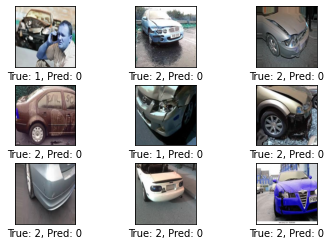

In [34]:
plot_example_errors(cls_pred)